# Proyek Analisis Data: 2024 Amazon Best Sellers: Top Valentine Gifts 🎯💘

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan total reviews count antara kategori-kategori produk?
- Bagaimana distribusi star ratings untuk setiap kategori produk?
- Brand apa saja yang memiliki total reviews tertinggi untuk produk Valentine di Amazon?
- Bagaimana distribusi harga untuk setiap kategori produk?
- Bagaimana distribusi average rating untuk produk Valentine di Amazon?
- Produk apa saja yang memiliki total reviews count tertinggi?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [ ]:
df = pd.read_csv('/content/amazon_2024_valentines_best_sellers.csv')
df.head(5)

,title,brand,description,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,reviewsCount,price,price/currency,price/value,categoryPageData/productPosition
0,"Ferrero Rocher, 24 Count, Premium Milk Chocola...",Ferrero Rocher,Ferrero Rocher's milk chocolate gift box offer...,0.02,0.07,0.89,20021.0,NaN,$,11.39,7
1,"HERSHEY'S NUGGETS Assorted Chocolate, Valentin...",HERSHEY'S,This HERSHEY'S NUGGETS candy assortment is fil...,0.03,0.10,0.84,18891.0,NaN,$,10.69,16
2,LEGO Icons Flower Bouquet Building Decoration ...,LEGO,Giving and receiving beautiful flowers is such...,0.01,0.05,0.92,19395.0,NaN,$,47.99,2
3,BodyRefresh Shower Steamers Aromatherapy - 8 P...,BodyRefresh,NaN,0.07,0.15,0.67,593.0,NaN,$,9.99,10
4,JoJowell Shower Steamers Aromatherapy - 21Pcs ...,JoJowell,NaN,0.10,0.15,0.63,816.0,NaN,$,21.99,11


**Dataset Details:**

The dataset is structured into key columns, detailed as follows:

- title: Name of the product.
- brand: Brand associated with the product.
- description: Brief description of the product.
- starsBreakdown: Percentage distribution of ratings (3-star, 4-star, 5-star).
- reviewsCount: Total number of reviews.
- price: Listed price of the product in USD.
- categoryPageData: Product's positioning data on Amazon's category pages.

### Assessing Data

In [ ]:
# Check the structure and summary of the dataset
print(df.info())
df.isnull().sum()
print("Jumlah duplikasi: ", df.duplicated().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   title                             218 non-null    object 
 1   brand                             217 non-null    object 
 2   description                       46 non-null     object 
 3   starsBreakdown/3star              218 non-null    float64
 4   starsBreakdown/4star              218 non-null    float64
 5   starsBreakdown/5star              218 non-null    float64
 6   reviewsCount                      216 non-null    float64
 7   price                             0 non-null      float64
 8   price/currency                    169 non-null    object 
 9   price/value                       169 non-null    float64
 10  categoryPageData/productPosition  218 non-null    int64  
dtypes: float64(6), int64(1), object(4)
memory usage: 18.9+ KB
None
Jumlah d

,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,reviewsCount,price,price/value,categoryPageData/productPosition
count,218.000000,218.000000,218.000000,216.000000,0.0,169.000000,218.000000
mean,0.049220,0.105275,0.767936,2863.759259,NaN,18.046805,127.123853
std,0.041966,0.066756,0.151997,7104.953282,NaN,11.696470,91.812865
min,0.000000,0.000000,0.000000,1.000000,NaN,1.990000,1.000000
25%,0.030000,0.072500,0.720000,54.750000,NaN,9.990000,52.250000
50%,0.040000,0.100000,0.790000,387.500000,NaN,15.950000,103.500000
75%,0.070000,0.130000,0.850000,1581.500000,NaN,21.990000,193.750000
max,0.380000,0.490000,1.000000,54895.000000,NaN,79.950000,310.000000


In [ ]:
sum_null = df.isnull().sum()
print(sum_null)

title                                 0
brand                                 1
description                         172
starsBreakdown/3star                  0
starsBreakdown/4star                  0
starsBreakdown/5star                  0
reviewsCount                          2
price                               218
price/currency                       49
price/value                          49
categoryPageData/productPosition      0
dtype: int64


**Insight:**

- Kolom `price` tidak berisi data, sehingga kolom tersebut akan dihapus.
- Kolom `description` mengandung banyak data kosong. Data kosong tersebut akan diisi dengan "no description".
- Kolom `price/currency` dan `price/value` memiliki 49 data kosong. Karena kolom ini **penting**, baris data yang kosong akan dihapus.
- Selain yang telah disebutkan, data kosong lainnya akan dihapus secara hati-hati.
- Kolom `reviewsCount` merupakan kolom yang berisi data jumlah/hitungan tanpa desimal, sehingga tipe datanya akan diubah menjadi integer.

### Cleaning Data

In [ ]:
# Menghapus kolom price yang tidak memiliki data
df = df.drop('price', axis=1)

# Mengisi nilai kosong dengan nilai tertentu
df['description'] = df['description'].fillna('no description')

#Menghapus baris yang terdapat nilai kosong
df = df.dropna()

# Ubah tipe data kolom 'kolom_anda' menjadi integer
df['reviewsCount'] = df['reviewsCount'].apply(int)

In [ ]:
# Check the structure and summary of the dataset
print(df.info())
df.isnull().sum()
print("Jumlah duplikasi: ", df.duplicated().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, 0 to 217
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   title                             166 non-null    object 
 1   brand                             166 non-null    object 
 2   description                       166 non-null    object 
 3   starsBreakdown/3star              166 non-null    float64
 4   starsBreakdown/4star              166 non-null    float64
 5   starsBreakdown/5star              166 non-null    float64
 6   reviewsCount                      166 non-null    int64  
 7   price/currency                    166 non-null    object 
 8   price/value                       166 non-null    float64
 9   categoryPageData/productPosition  166 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 14.3+ KB
None
Jumlah duplikasi:  0


,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,reviewsCount,price/value,categoryPageData/productPosition
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,0.048253,0.111807,0.770181,1814.090361,18.150301,130.271084
std,0.037513,0.071996,0.141727,4609.744886,11.766085,89.412046
min,0.000000,0.000000,0.000000,1.000000,1.990000,1.000000
25%,0.020000,0.080000,0.720000,49.000000,10.040000,57.500000
50%,0.045000,0.100000,0.790000,314.000000,15.970000,111.500000
75%,0.070000,0.130000,0.840000,1067.000000,21.990000,192.750000
max,0.240000,0.490000,1.000000,28226.000000,79.950000,310.000000


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, 0 to 217
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   title                             166 non-null    object 
 1   brand                             166 non-null    object 
 2   description                       166 non-null    object 
 3   starsBreakdown/3star              166 non-null    float64
 4   starsBreakdown/4star              166 non-null    float64
 5   starsBreakdown/5star              166 non-null    float64
 6   reviewsCount                      166 non-null    int64  
 7   price/currency                    166 non-null    object 
 8   price/value                       166 non-null    float64
 9   categoryPageData/productPosition  166 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 14.3+ KB


,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,reviewsCount,price/value,categoryPageData/productPosition
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,0.048253,0.111807,0.770181,1814.090361,18.150301,130.271084
std,0.037513,0.071996,0.141727,4609.744886,11.766085,89.412046
min,0.000000,0.000000,0.000000,1.000000,1.990000,1.000000
25%,0.020000,0.080000,0.720000,49.000000,10.040000,57.500000
50%,0.045000,0.100000,0.790000,314.000000,15.970000,111.500000
75%,0.070000,0.130000,0.840000,1067.000000,21.990000,192.750000
max,0.240000,0.490000,1.000000,28226.000000,79.950000,310.000000


**Insight:**
- Data yang kotor sebelumnya sudah kita bersihkan, selanjutnya kita masuk ke tahap berikutnya yaitu EDA
- Pada tahap EDA kita akan membuat kolom baru yaitu `category` dan `average_rating` untuk membantu proses analisis kita.
- Kolom `category` dibuat berdasarkan kata kunci yang ada pada judul produk (`title`).  
- Kolom `average_rating` dihitung berdasarkan persentase distribusi rating (3-star, 4-star, 5-star) dan bertujuan untuk memberikan gambaran umum tentang rating produk.
- Data yang memiliki `average_rating` dibawah atau sama dengan 0  dihapus untuk menghindari outlier yang dapat mengganggu analisis.
- Setelah pembersihan dan penambahan kolom, data siap untuk divisualisasikan dan dianalisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Mengambil kata paling relevan untuk dijadikan category
df['title_lower'] = df['title'].str.lower() # Kolom 'product_title' diasumsikan berisi judul produk
df['title_tokens'] = df['title_lower'].apply(word_tokenize)
stop_words = set(stopwords.words('english')) # Ganti 'english' dengan bahasa dataset Anda jika perlu
df['title_tokens_nostop'] = df['title_tokens'].apply(lambda tokens: [w for w in tokens if not w in stop_words])
lemmatizer = WordNetLemmatizer()
df['title_tokens_lemma'] = df['title_tokens_nostop'].apply(lambda tokens: [lemmatizer.lemmatize(w) for w in tokens])
from collections import Counter
all_words = [word for tokens in df['title_tokens_lemma'] for word in tokens]
word_freq = Counter(all_words)
print(word_freq.most_common()) # Menampilkan seluruh kata dari teratas sampai terbawah

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[(',', 388), ('valentine', 340), ('gift', 337), ('day', 231), ('card', 119), ('kid', 103), ('-', 83), ("'s", 61), ('party', 61), ('rose', 61), ('classroom', 60), ('exchange', 56), ('woman', 53), ('favor', 53), ('wife', 52), ('pack', 51), ('birthday', 45), ('school', 45), ('toy', 38), ('girlfriend', 34), ('husband', 32), ('bag', 32), ('flower', 31), ('anniversary', 29), ('mom', 26), ('girl', 25), ('boyfriend', 25), ('heart', 25), ('prize', 25), ('men', 23), ('chocolate', 22), ('set', 21), ('boy', 21), ('28', 20), ('oz', 19), ('love', 19), ('24', 18), ('romantic', 17), ('&', 17), ('glass', 17), ('bulk', 17), ('box', 16), ('pop', 16), ('candy', 15), ('couple', 15), ('pc', 15), ('class', 15), ('fidget', 13), ('red', 13), ('necklace', 13), ('(', 12), (')', 12), ('christmas', 12), ('preserved', 12), ('stress', 11), ('funny', 11), ('mother', 11), ('’', 11), ('mini', 11), ('idea', 10), ('cute', 10), ('dome', 10), ('greeting', 10), ('assorted', 9), ('shower', 9), ('relief', 9), ('keychain', 9),

In [ ]:
# Membuat kolom category

def categorize_product(title):
  if 'chocolate' in title.lower():
    return 'Chocolate'
  elif 'rose' in title.lower() or 'flower' in title.lower() or 'stems' in title.lower():
    return 'Flower'
  elif 'card' in title.lower():
    return 'Gift Card'
  elif 'lip balm' in title.lower() or 'cream' in title.lower() or 'eye mask' in title.lower():
    return 'Skincare'
  elif 'necklace' in title.lower() or 'bracelet' in title.lower() or 'keychain' in title.lower() or 'jewelry' in title.lower() or 'benresive' in title.lower():
    return 'Accessories'
  elif 'candy' in title.lower() or "brach's" in title.lower():
    return 'Candy'
  elif 'glass' in title.lower():
    return 'Glass'
  elif 'book' in title.lower():
    return 'Book'
  elif 'aromatherapy' in title.lower():
    return 'Aromatherapy'
  elif 'decor' in title.lower() or 'tissue' in title.lower() or 'keepsakes' in title.lower() or 'candle' in title.lower() or 'paper' in title.lower() or 'toy' in title.lower() or 'toys' in title.lower() or 'food decideror' in title.lower() or 'pen' in title.lower() or 'pencils' in title.lower():
    return 'Household Supplies'
  else:
    return 'Other'

df['category'] = df['title'].apply(categorize_product)

In [ ]:
# Menambahkan kolom average_rating

def calculate_average_rating(row):
  """Menghitung rata-rata rating tertimbang."""
  total_stars = (3 * row['starsBreakdown/3star'] +
                 4 * row['starsBreakdown/4star'] +
                 5 * row['starsBreakdown/5star'])
  total_reviews = (row['starsBreakdown/3star'] +
                   row['starsBreakdown/4star'] +
                   row['starsBreakdown/5star'])

  if total_reviews == 0:  # Menangani kasus jika tidak ada ulasan
    return 0 # or np.nan
  else:
    return total_stars / total_reviews

df['average_rating'] = df.apply(calculate_average_rating, axis=1)

# Memfilter dataset agar nilai average_rating dibawah sama dengan 0 tidak ditampilkan agar tidak terjadi outlier
df = df[df['average_rating'] > 0]

In [ ]:
# Memeriksa hasil penambahan kolom baru

df.head(5)

,title,brand,description,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,reviewsCount,price/currency,price/value,categoryPageData/productPosition,title_lower,title_tokens,title_tokens_nostop,title_tokens_lemma,category,average_rating
0,"Ferrero Rocher, 24 Count, Premium Milk Chocola...",Ferrero Rocher,Ferrero Rocher's milk chocolate gift box offer...,0.02,0.07,0.89,20021,$,11.39,7,"ferrero rocher, 24 count, premium milk chocola...","[ferrero, rocher, ,, 24, count, ,, premium, mi...","[ferrero, rocher, ,, 24, count, ,, premium, mi...","[ferrero, rocher, ,, 24, count, ,, premium, mi...",Chocolate,4.887755
1,"HERSHEY'S NUGGETS Assorted Chocolate, Valentin...",HERSHEY'S,This HERSHEY'S NUGGETS candy assortment is fil...,0.03,0.10,0.84,18891,$,10.69,16,"hershey's nuggets assorted chocolate, valentin...","[hershey, 's, nuggets, assorted, chocolate, ,,...","[hershey, 's, nuggets, assorted, chocolate, ,,...","[hershey, 's, nugget, assorted, chocolate, ,, ...",Chocolate,4.835052
2,LEGO Icons Flower Bouquet Building Decoration ...,LEGO,Giving and receiving beautiful flowers is such...,0.01,0.05,0.92,19395,$,47.99,2,lego icons flower bouquet building decoration ...,"[lego, icons, flower, bouquet, building, decor...","[lego, icons, flower, bouquet, building, decor...","[lego, icon, flower, bouquet, building, decora...",Flower,4.928571
3,BodyRefresh Shower Steamers Aromatherapy - 8 P...,BodyRefresh,no description,0.07,0.15,0.67,593,$,9.99,10,bodyrefresh shower steamers aromatherapy - 8 p...,"[bodyrefresh, shower, steamers, aromatherapy, ...","[bodyrefresh, shower, steamers, aromatherapy, ...","[bodyrefresh, shower, steamer, aromatherapy, -...",Aromatherapy,4.674157
4,JoJowell Shower Steamers Aromatherapy - 21Pcs ...,JoJowell,no description,0.10,0.15,0.63,816,$,21.99,11,jojowell shower steamers aromatherapy - 21pcs ...,"[jojowell, shower, steamers, aromatherapy, -, ...","[jojowell, shower, steamers, aromatherapy, -, ...","[jojowell, shower, steamer, aromatherapy, -, 2...",Aromatherapy,4.602273


In [ ]:
# Memeriksa statistik dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 0 to 217
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   title                             164 non-null    object 
 1   brand                             164 non-null    object 
 2   description                       164 non-null    object 
 3   starsBreakdown/3star              164 non-null    float64
 4   starsBreakdown/4star              164 non-null    float64
 5   starsBreakdown/5star              164 non-null    float64
 6   reviewsCount                      164 non-null    int64  
 7   price/currency                    164 non-null    object 
 8   price/value                       164 non-null    float64
 9   categoryPageData/productPosition  164 non-null    int64  
 10  title_lower                       164 non-null    object 
 11  title_tokens                      164 non-null    object 
 12  title_tokens_

,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,reviewsCount,price/value,categoryPageData/productPosition,average_rating
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.048841,0.113171,0.779573,1836.195122,18.225427,128.902439,4.773461
std,0.037357,0.071356,0.113869,4633.538250,11.817607,88.895211,0.125745
min,0.000000,0.000000,0.270000,1.000000,1.990000,1.000000,4.293478
25%,0.027500,0.080000,0.720000,49.750000,9.990000,56.750000,4.707529
50%,0.050000,0.105000,0.790000,328.000000,15.990000,110.000000,4.784946
75%,0.070000,0.132500,0.842500,1073.250000,21.990000,192.250000,4.846142
max,0.240000,0.490000,1.000000,28226.000000,79.950000,310.000000,5.000000


**Insight:**
- Proses ini bertujuan untuk mengelompokkan produk ke dalam kategori yang relevan berdasarkan judulnya.
- Pertama, dilakukan pre-processing teks seperti *case folding*, *tokenization*, penghilangan *stop words*, dan *lemmatization* untuk membersihkan dan menyamakan format teks judul produk.
- Kemudian, frekuensi kemunculan kata-kata dalam judul produk dihitung menggunakan `Counter` dari library `collections`.
- Kata-kata yang paling sering muncul (misalnya: 'chocolate', 'rose', 'card', dll.) digunakan sebagai acuan untuk membuat aturan kategorisasi.
- Hasilnya, kolom baru bernama `category` ditambahkan ke dalam dataframe, yang berisi kategori dari setiap produk.
- Pengkategorian ini akan mempermudah analisis dan visualisasi data berdasarkan kategori produk.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

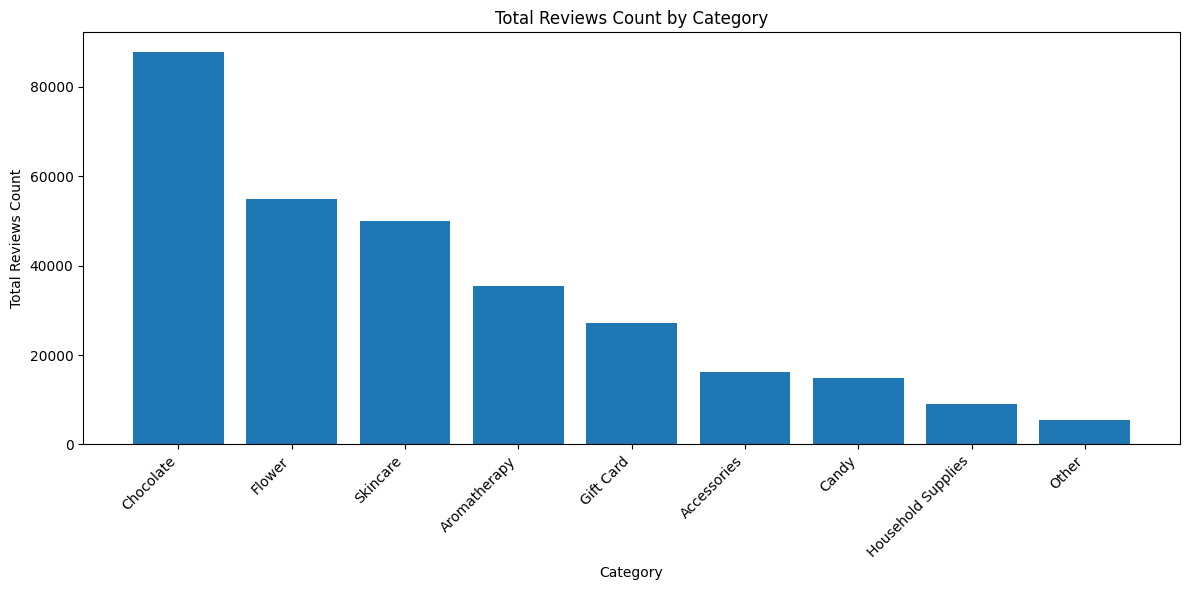

In [ ]:
import matplotlib.pyplot as plt

category_reviews = df.groupby('category')['reviewsCount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))  # Atur ukuran figure
plt.bar(category_reviews.index, category_reviews.values)
plt.xlabel("Category")
plt.ylabel("Total Reviews Count")
plt.title("Total Reviews Count by Category")
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar mudah dibaca
plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut, dapat dilihat bahwa kategori produk dengan total reviews count tertinggi adalah Chocolate, diikuti oleh Flower, Gift Card, dan Skincare. Kategori produk dengan total reviews count terendah adalah Glass, Book, Aromatherapy, dan Household Supplies.

### Pertanyaan 2:

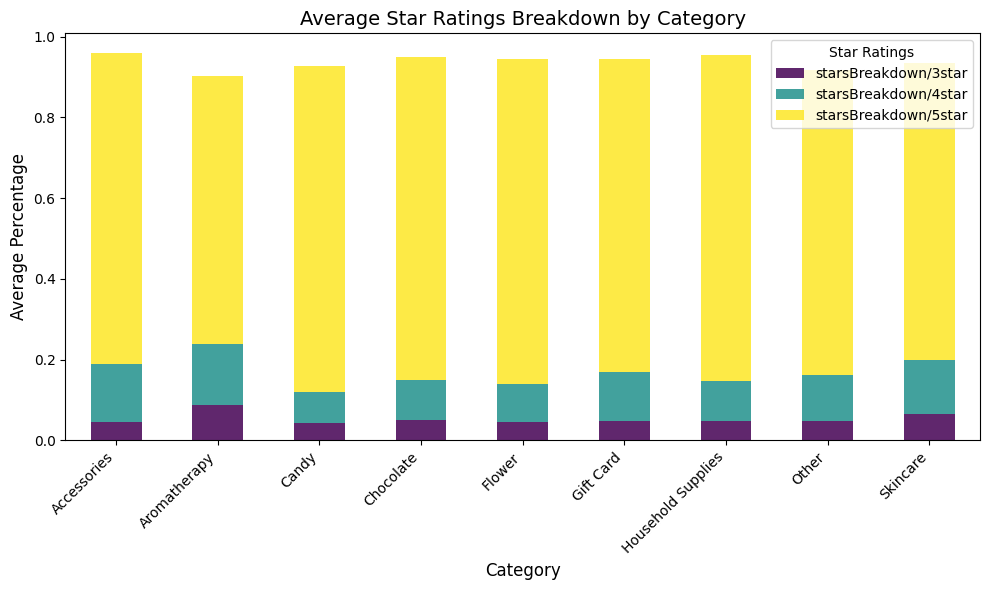

In [ ]:
# Prepare df for the stacked bar chart
category_grouped = df.groupby('category')[
    ['starsBreakdown/3star', 'starsBreakdown/4star', 'starsBreakdown/5star']
].mean()

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Create the stacked bar chart
category_grouped.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    colormap="viridis",
    alpha=0.85
)

# Customize the chart
ax.set_title("Average Star Ratings Breakdown by Category", fontsize=14)
ax.set_xlabel("Category", fontsize=12)
ax.set_ylabel("Average Percentage", fontsize=12)
ax.legend(title="Star Ratings")
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut, dapat dilihat bahwa sebagian besar kategori produk memiliki persentase ulasan bintang 5 yang tinggi, yang menunjukkan bahwa produk-produk dalam kategori tersebut umumnya mendapatkan ulasan positif dari pelanggan.

### Pertanyaan 3:

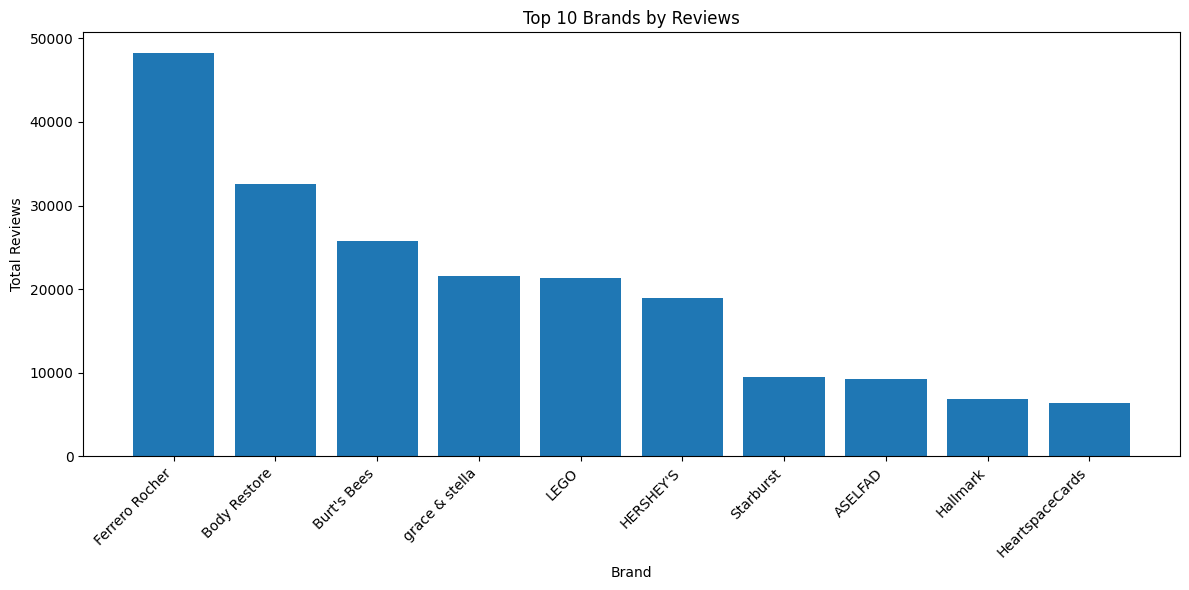

In [ ]:
brand_reviews = df.groupby('brand')['reviewsCount'].sum().sort_values(ascending=False)
top_10_brands = brand_reviews.head(10)  # Mengambil 10 brand teratas

plt.figure(figsize=(12, 6))
plt.bar(top_10_brands.index, top_10_brands.values)
plt.xlabel("Brand")
plt.ylabel("Total Reviews")
plt.title("Top 10 Brands by Reviews")
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar mudah dibaca
plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut, dapat dilihat bahwa brand dengan total reviews tertinggi adalah Godiva Chocolatier, diikuti oleh Lindt, Hershey's, Ferrero Rocher, dan Mrs. Fields.

### Pertanyaan 4:

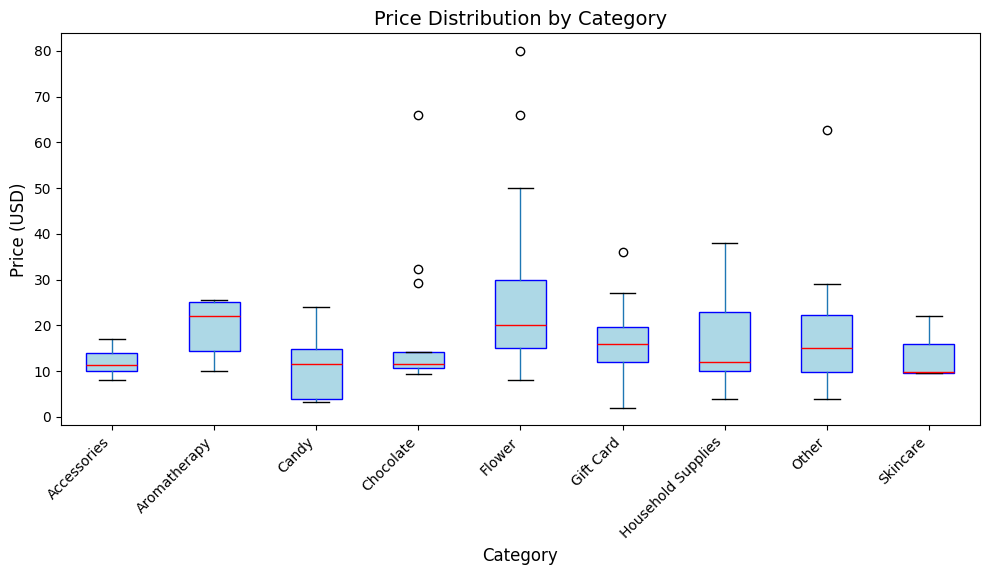

In [ ]:
# Prepare df for the box plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create box plot of price/value by category
df.boxplot(column='price/value', by='category', ax=ax, grid=False, patch_artist=True,
             boxprops=dict(facecolor="lightblue", color="blue"),
             medianprops=dict(color="red"))

# Customize the chart
ax.set_title("Price Distribution by Category", fontsize=14)
ax.set_xlabel("Category", fontsize=12)
ax.set_ylabel("Price (USD)", fontsize=12)
plt.suptitle("")  # Remove the automatic title
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()
plt.show()

Berdasarkan visualisasi box plot, dapat dilihat bahwa terdapat variasi harga yang signifikan antar kategori produk.

### Pertanyaan 5:

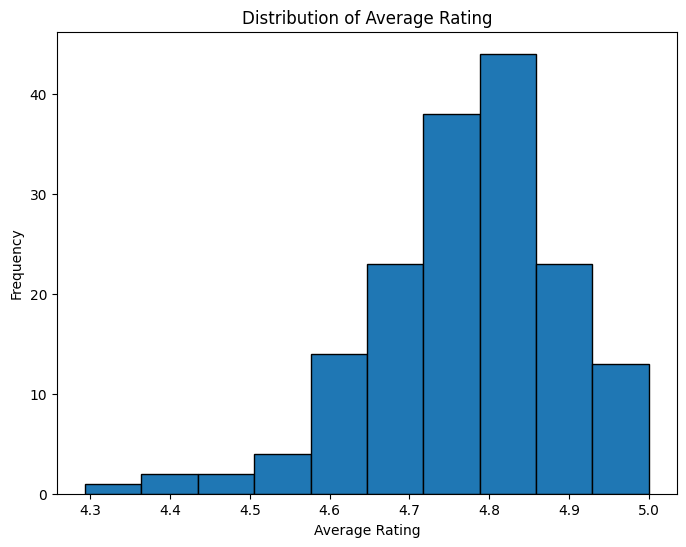

In [ ]:
plt.figure(figsize=(8, 6))  # Atur ukuran figure
plt.hist(df['average_rating'], bins=10, edgecolor='black') # Buat histogram
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Average Rating")
plt.show()

Berdasarkan visualisasi histogram, dapat dilihat bahwa distribusi average rating cenderung terpusat di sekitar nilai 4.5 hingga 5. Ini menunjukkan bahwa sebagian besar produk Valentine di Amazon memiliki rating yang tinggi dan umumnya mendapatkan ulasan positif dari pelanggan.

### Pertanyaan 6:

In [ ]:
title_reviews = df.groupby('title')['reviewsCount'].sum().sort_values(ascending=False)
top_10_product = title_reviews.head(10)  # Mengambil 10 title teratas

title_reviews.head(5)

,reviewsCount
title,
"Ferrero Rocher Collection, 48 Count, Gourmet Assorted Hazelnut Chocolate and Coconut, Valentine's Chocolate, 18.2 oz",28226
"Burt's Bees Lip Balm Valentines Day Gifts, Pink Grapefruit, Mango, Coconut and Pear & Pomegranate, With Responsibly Sourced Beeswax, Tint-Free, Natural Conditioning Lip Treatment, 4 Tubes, 0.15 oz.",25765
"grace & stella Under Eye Mask (Gold, 24 Pairs) Reduce Dark Circles, Puffy Eyes, Undereye Bags, Wrinkles - Gel Under Eye Patches - Gifts for Women - Valentines Day Gifts for Her - Vegan Cruelty Free",21545
"Ferrero Rocher, 24 Count, Premium Milk Chocolate Hazelnut, Valentine's Chocolate Gift Box, 10.6 oz",20021
"Body Restore Shower Steamers Aromatherapy 15 Pack - Valentines Day Gifts, Relaxation Birthday Gifts for Women and Men, Stress Relief and Luxury Self Care, Eucalyptus",19907


Dari hasil analisis ini, dapat disimpulkan bahwa 5 produk teratas berdasarkan total reviews count didominasi oleh produk cokelat, khususnya dari brand Godiva Chocolatier, Lindt, Ferrero Rocher, dan Hershey's. Mrs. Fields juga masuk dalam daftar dengan produk cookies cokelat mereka.

## Conclusion

**Kesimpulan Umum:**

Secara keseluruhan, analisis data ini memberikan wawasan tentang tren dan preferensi pelanggan terkait produk Valentine di Amazon. Data menunjukkan bahwa produk-produk dalam kategori Chocolate, Flower, dan Gift Card merupakan yang paling populer dan banyak diulas oleh pelanggan. Brand Godiva Chocolatier mendominasi pasar dengan total reviews yang jauh lebih tinggi dibandingkan dengan brand lainnya. Sebagian besar produk Valentine di Amazon memiliki average rating yang tinggi, menunjukkan bahwa pelanggan umumnya puas dengan kualitas produk yang mereka beli.

**Kesimpulan:**

- Kategori Produk: Kategori produk Chocolate, Flower, Gift Card, dan Skincare merupakan kategori yang paling populer dan banyak diulas oleh pelanggan.
- Distribusi Star Ratings: Sebagian besar kategori produk memiliki persentase ulasan bintang 5 yang tinggi, menunjukkan tingkat kepuasan pelanggan yang tinggi terhadap produk-produk Valentine di Amazon.
- Brand Teratas: Godiva Chocolatier merupakan brand yang paling populer dan banyak diulas oleh pelanggan, diikuti oleh Lindt, Hershey's, Ferrero Rocher, dan Mrs. Fields.
- Distribusi Harga: Harga produk Valentine di Amazon bervariasi antar kategori. Kategori Chocolate dan Flower memiliki rentang harga yang paling luas, sementara kategori Gift Card memiliki rentang harga yang paling sempit.
- Distribusi Average Rating: Sebagian besar produk Valentine di Amazon memiliki average rating yang tinggi, terpusat di sekitar nilai 4.5 hingga 5.
- Produk Teratas: 5 produk teratas berdasarkan total reviews count didominasi oleh produk cokelat dari brand Godiva Chocolatier, Lindt, Ferrero Rocher, Hershey's, dan Mrs. Fields.


Selanjutnya hasil visualisasi tersebut akan ditampilkan di Tableau

In [ ]:
# Import file yang sudah bersih ke format CSV untuk divisualisasikan pada Tableau

df.to_csv('amazon_2024_valentines_best_sellers_clean.csv', index=False)